In [19]:
import albumentations as A
import cv2


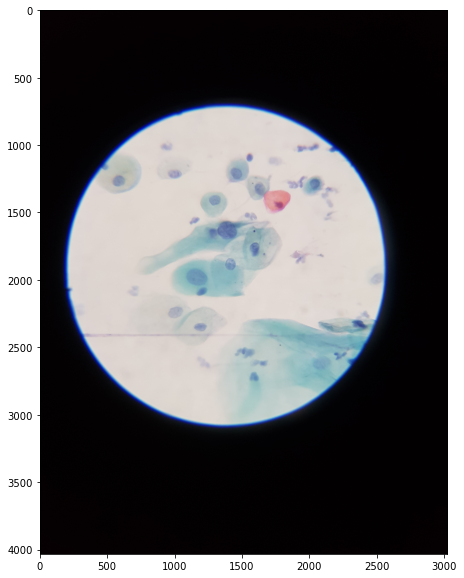

In [206]:
image = cv2.imread('sample.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# bboxes = [
#     [23, 74, 295, 388, 'dog'],
#     [377, 294, 1252, 1161, 'cat'],
#     [733, 921, 1049, 1049, 'sports ball'],
# ]

bboxes = [
    [23, 74, 295, 388],
    [377, 294, 1252, 1161],
    [1733, 1421, 2049, 1649],
]
class_labels = ['dog', 'cat', 'sports ball']
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(image)

In [207]:
image.shape

(4032, 3024, 3)

In [208]:
transform = A.Compose([
#     A.RandomCrop(width=450, height=450),
#     A.HorizontalFlip(p=0.5),
    A.CenterCrop(1600,1600,True,1)
#     A.Crop(x_min=1300, y_min=0, x_max=2700,y_max=1500)
#     A.Crop(x_min=0, y_min=500, x_max=1800,y_max=3500)
#     A.Resize(height=512, width=512, p=1),
#     A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='pascal_voc', min_area=0, min_visibility=0, label_fields=['class_labels']))

In [209]:
# transform = A.Compose([
#     A.RandomCrop(width=450, height=450),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2),
# ], bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['class_labels']))

In [210]:
transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']

[(1021.0000000000001, 204.99999999999997, 1337.0, 433.0)]
['sports ball']


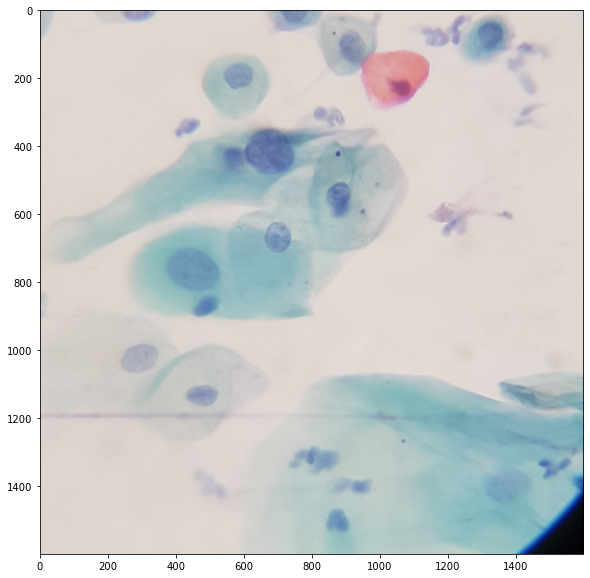

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
print(transformed_bboxes)
print(transformed_class_labels)
plt.figure(figsize=(10, 10))
plt.imshow(transformed_image)